# Meta Learning Tutorial with the Omniglot Dataset

In [36]:
import functools

import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import optax

import omniglot_dataset
import maml

## Explore the Omniglot fataset a bit

Plotting and exploration based on https://github.com/LecJackS/CS-330-Deep-Multi-Task-and-Meta-Learning/blob/master/hw1/%5BOLD%5DHomework%201%20-%20Step%20by%20step.ipynb

In [14]:
num_classes = 5
num_samples_per_class = 3
omniglot = omniglot_dataset.Omniglot(128, num_classes, num_samples_per_class)

support, query = next(omniglot.train_set)

In [30]:
def plot_example(images, labels):
    plt.figure(figsize=(16, 10))
    count = 0
    for cl in range(images.shape[2]):
        for sa in range(images.shape[1]):
            plt.subplot(num_samples_per_class, num_classes, count + 1)
            plt.title("Class {}\nExample {}\nLabel {}".format(cl, sa, labels[0, sa, cl]))
            image = images[0, sa, cl].reshape((28,28))
            plt.imshow(image, cmap='Greys')
            plt.axis('off');
            count += 1

Plot of an example support set

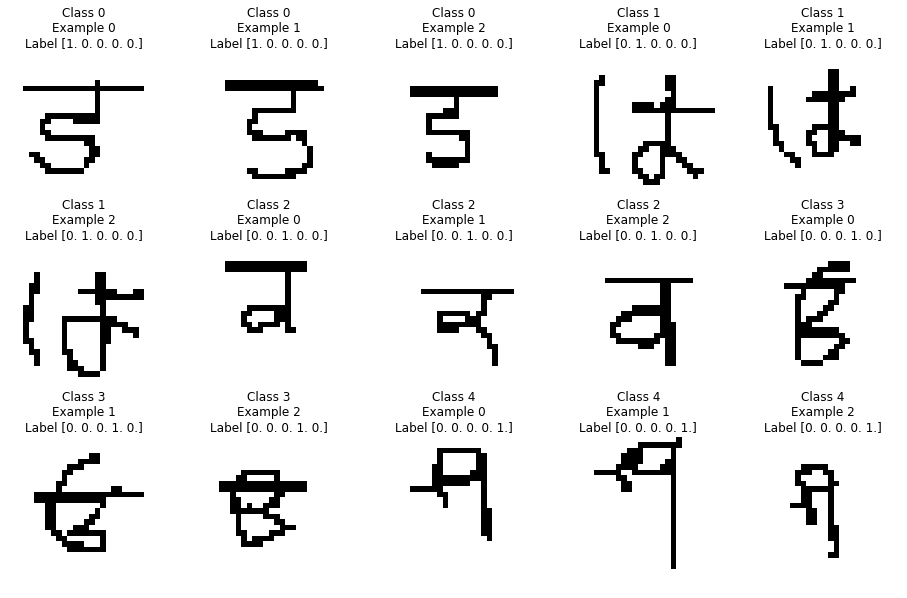

In [31]:
plot_example(*support)

Plot it's corresponding query set

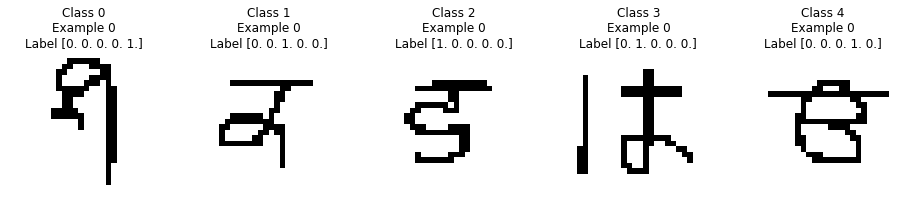

In [32]:
plot_example(*query)

Seems like the query and support sets labels match so everything is good with the data generator!

## Defining a (meta) training loop

In [38]:
@functools.partial(jax.jit, static_argnums=0)
def update(model, prior_params, opt_state, support, query):
    grads = model.update_step(prior_params, support, query)

def train(model, data):
    eval_loss = []
    opt = optax.flatten(optax.adam(1e-3))
    opt_state = opt.init(model.prior_params)
    for step in range(20000):
        model.prior_params, opt_state = update(model, model.prior_params, opt_state, *next(data.train_set))
        if step % 100 == 0:
            eval_support, eval_query = next(data.eval_set)
            posterior_params = model.adaptation_step(model.prior_params, *)
            
